Lab 3 Back Propagation

Imagine you are building a neural network model to classify handwritten digits from the MNIST dataset. The architecture of your network consists of an input layer with 784 neurons (one for each pixel in a 28x28 image), one hidden layer with 128 neurons, and an output layer with 10 neurons (one for each digit from 0 to 9). You are using the ReLU activation function for the hidden layer and the softmax activation function for the output layer.
During the training process, you notice that the loss function (categorical cross-entropy) is not decreasing as expected after several epochs. To investigate, you decide to analyze the backpropagation process in your model. Imagine you are building a neural network model to classify handwritten digits from the MNIST dataset. 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8796 - loss: 0.4189 - val_accuracy: 0.9566 - val_loss: 0.1406
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9645 - loss: 0.1198 - val_accuracy: 0.9693 - val_loss: 0.0982
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0785 - val_accuracy: 0.9705 - val_loss: 0.0964
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0571 - val_accuracy: 0.9760 - val_loss: 0.0765
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9874 - loss: 0.0416 - val_accuracy: 0.9783 - val_loss: 0.0750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9791 - val_loss: 0.0694
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0249 - val_accuracy: 0.9760 - val_loss: 0.0829
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0210 -

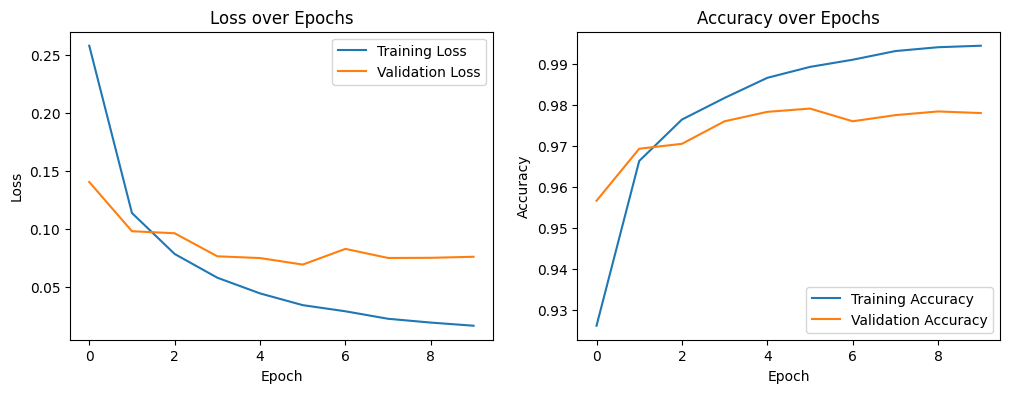

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


print("Final training loss:", loss[-1])
print("Final validation loss:", val_loss[-1])

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


The model performs well in terms of both training and validation accuracy, reaching nearly 100% training accuracy and stabilizing around 97.8% validation accuracy. The training loss steadily decreases, indicating effective learning, while the validation loss decreases initially but plateaus after about six epochs, suggesting the model may be slightly overfitting. The small gap between training and validation loss and accuracy indicates that overfitting is minimal but present. To improve generalization further, techniques like early stopping, dropout, or hyperparameter tuning could be considered. Overall, the model is well-trained and exhibits strong performance on unseen data, with room for slight optimization.

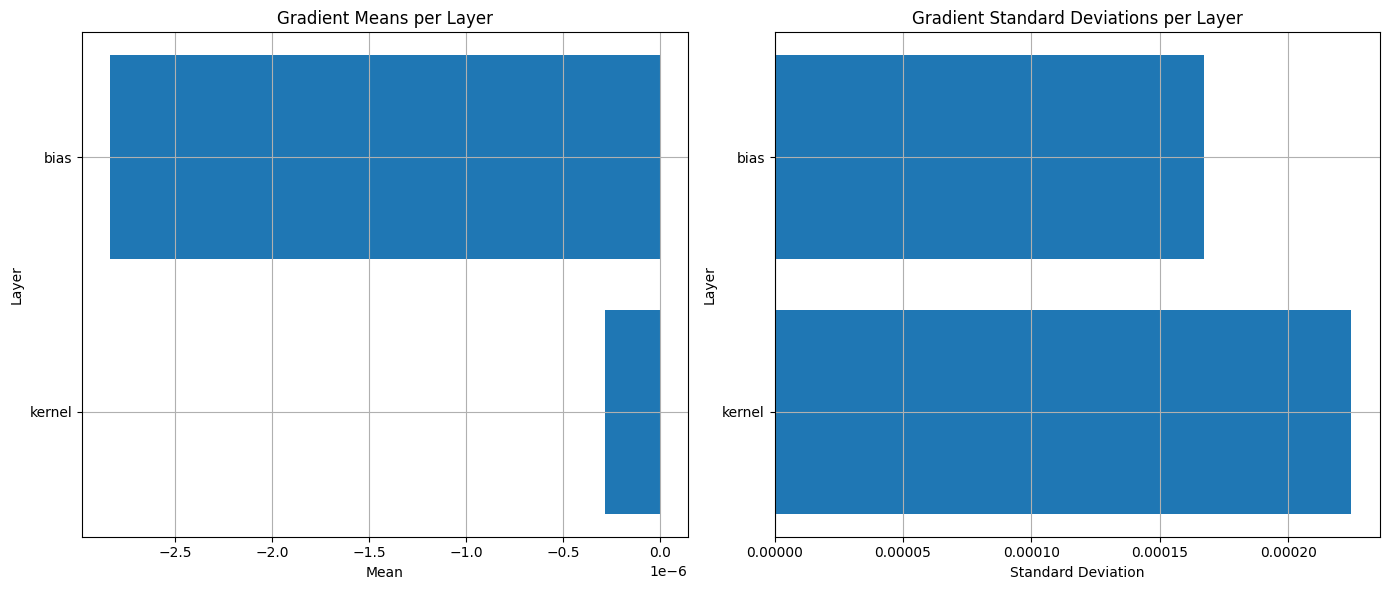

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

with tf.GradientTape() as tape:
    predictions = model(x_train[:32])
    loss_value = CategoricalCrossentropy()(y_train[:32], predictions)
grads = tape.gradient(loss_value, model.trainable_variables)

grad_means = []
grad_stds = []
layer_names = []

for var, grad in zip(model.trainable_variables, grads):
    grad_means.append(np.mean(grad))
    grad_stds.append(np.std(grad))
    layer_names.append(var.name)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(layer_names, grad_means)
plt.title('Gradient Means per Layer')
plt.xlabel('Mean')
plt.ylabel('Layer')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.barh(layer_names, grad_stds)
plt.title('Gradient Standard Deviations per Layer')
plt.xlabel('Standard Deviation')
plt.ylabel('Layer')
plt.grid(True)

plt.tight_layout()
plt.show()
